In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('CitarumWater.csv')
df.head(10)

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.0430,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.0110,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.2300,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.0570,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.1100,-,2.44,2
5,6,Citarum,Bendung Walahar,18/04/2018,7.34,25.55°C,17.0,6.48,2.89,6.86,1.29,11000.0,0.0990,-,4.45,2
6,7,Citarum,Tunggak Jati,18/04/2018,7.41,25.55°C,18.0,5.10,3.38,10.80,0.96,160000.0,0.5100,-,8.64,3
7,8,Citarum,Wangisagara,30/05/2018,7.54,25.55°C,9.0,6.33,3.61,10.30,2.47,22000.0,0.0043,-,5.53,3
8,9,Citarum,Koyod,30/05/2018,7.64,25.55°C,13.0,2.18,9.15,26.80,2.90,170000.0,0.0043,-,8.74,3
9,10,Citarum,Setelah IPAL Cisirung,30/05/2018,7.82,25.55°C,27.0,1.45,12.00,45.70,3.05,280000.0,0.0830,-,9.55,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


In [8]:
df.isnull().sum()

No               0
NamaSungai       0
TitikPantau      0
Waktu            0
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
O2               0
IP               0
Class            0
dtype: int64

In [10]:
df.describe(include=object)

,NamaSungai,TitikPantau,Waktu,Temp,O2
count,2500,2500,2500,2500,2500
unique,1,8,1785,1,1
top,Citarum,Wangisagara,01/07/2022,25.55°C,-
freq,2500,314,8,2500,2500


In [11]:
df.describe()

,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000


In [12]:
# Hapus kolom yang tidak diperlukan
df_cleaned = df.drop(columns=["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2"])

In [13]:
# Pisahkan fitur dan target
X = df_cleaned.drop(columns=["Class"])
y = df_cleaned["Class"]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Bagi dataset menjadi training dan testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Buat model Logistic Regression
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [16]:
# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [22]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')

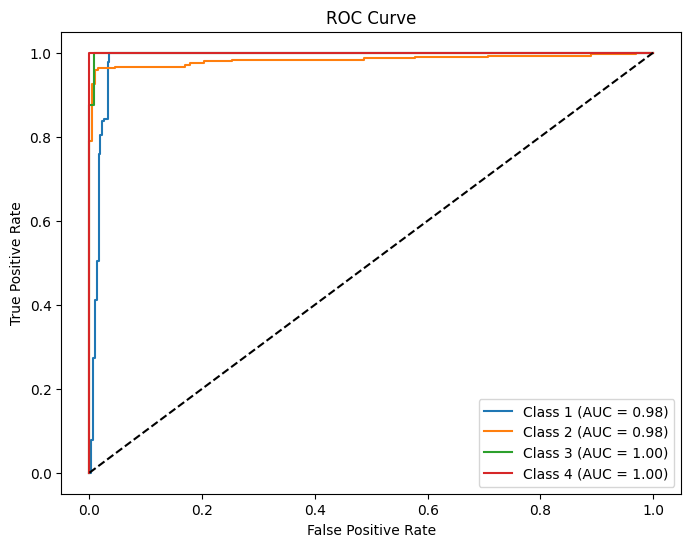

In [24]:
# Plot ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in np.unique(y):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i-1])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_prob[:, i-1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
# Tampilkan hasil evaluasi
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('F1 Squared : ',f1)
print('AUC : ',auc)
print('Recall : ',recall)

Accuracy :  0.962
Precision :  0.9626195637261629
F1 Squared :  0.9608421861767962
AUC :  0.9918171164770214
Recall :  0.962



## Accuracy
Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

\[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]

Di mana:
- **TP (True Positive):** Prediksi positif yang benar.
- **TN (True Negative):** Prediksi negatif yang benar.
- **FP (False Positive):** Prediksi positif yang salah.
- **FN (False Negative):** Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.



## Precision
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:

\[ Precision = \frac{TP}{TP + FP} \]

Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.



## Recall
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:

\[ Recall = \frac{TP}{TP + FN} \]

Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.



## F1-Score
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:

\[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} \]

F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.



## AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

- **True Positive Rate (TPR) atau Recall:** \( TPR = \frac{TP}{TP + FN} \)
- **False Positive Rate (FPR):** \( FPR = \frac{FP}{FP + TN} \)

AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.
